In [1]:
import os

In [2]:
data_dir = 'D:\\##Project##\\Deep Learning Project\\Malaria Classification\\cell_images'

In [3]:
os.listdir(data_dir)

['test', 'train']

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib.image import imread

In [6]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [7]:
test_path, test_path

('D:\\##Project##\\Deep Learning Project\\Malaria Classification\\cell_images\\test\\',
 'D:\\##Project##\\Deep Learning Project\\Malaria Classification\\cell_images\\test\\')

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [10]:
#Based on image of cell we will predict wheather it is infected or not.

In [11]:
os.listdir(test_path + 'parasitized')[2]

'C100P61ThinF_IMG_20150918_145609_cell_145.png'

In [12]:
para_cell = test_path + 'parasitized'+'\\C100P61ThinF_IMG_20150918_145609_cell_145.png'

In [13]:
para_cell

'D:\\##Project##\\Deep Learning Project\\Malaria Classification\\cell_images\\test\\parasitized\\C100P61ThinF_IMG_20150918_145609_cell_145.png'

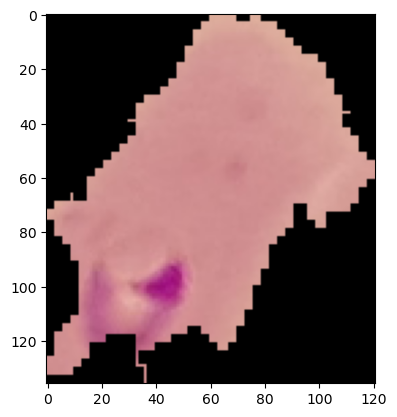

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [16]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
imread(uninfected_cell).shape

(139, 160, 3)

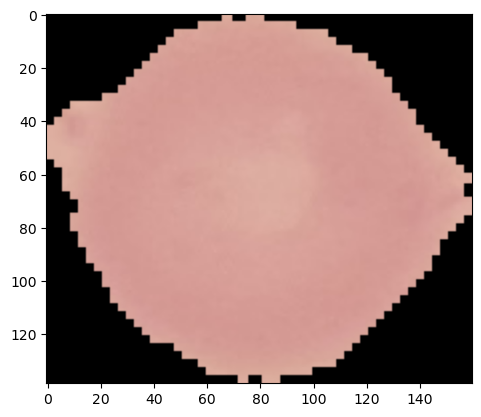

In [18]:
plt.imshow(imread(uninfected_cell))

In [19]:
len(os.listdir(train_path + 'parasitized'))

12480

In [20]:
len(os.listdir(test_path + 'parasitized'))

1300

In [21]:
len(os.listdir(train_path + 'uninfected'))

12480

In [22]:
len(os.listdir(test_path + 'uninfected'))

1300

In [23]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected\\' + image_filename)
    d1, d2, color = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [24]:
dim1 #All are of different dimension

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [26]:
# sns.jointplot(dim1, dim2)

In [27]:
#dimension of some image is very less while some very large

In [28]:
#but cnn cannot train on images of various shape/size

In [29]:
np.mean(dim1)

130.92538461538462

In [30]:
np.mean(dim2)

130.75

In [31]:
#so most of the images are near the range of 130 by 130. So we can reshape them to that shape.

In [32]:
image_shape = (130, 130, 3)

In [33]:
130*130*3 #data points

50700

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# help(ImageDataGenerator)

In [36]:
#since we are dealing with simple blood cell data we can rotate and squeeze but if it's facial data we have to be very careful

In [37]:
#If making a video cam to record faces we won't to train it on faces rotated by 120 degrees.

In [38]:
image_gen = ImageDataGenerator(rotation_range=20,    #we will be doing this to generate more random data.
                              width_shift_range=0.1, #randomly width height from 0 to 10%
                              height_shift_range=0.1, #randomly stretch height from 0 to 10%
#                               rescale = Already rescaled (if not 1/255 was to be done.) 
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

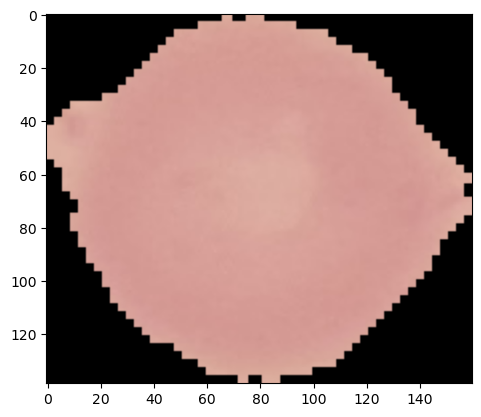

In [39]:
plt.imshow(imread(uninfected_cell))

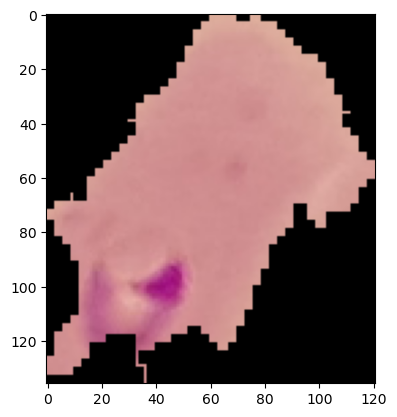

In [40]:
plt.imshow(imread(para_cell))
para_img = imread(para_cell)

In [41]:
new_img = image_gen.random_transform(para_img)

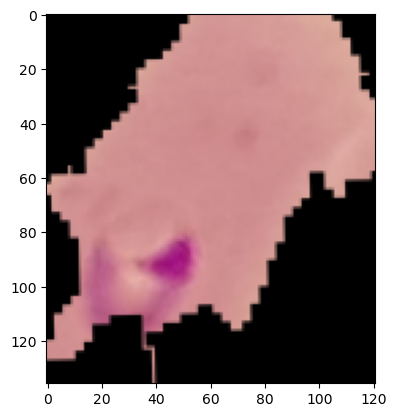

In [42]:
plt.imshow(new_img)

In [43]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [44]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [45]:
 from tensorflow.keras.models import Sequential

In [46]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [47]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [51]:
batch_size = 16

In [52]:
train_img_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary')

Found 24958 images belonging to 2 classes.


In [53]:
test_img_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], color_mode='rgb',
                                             batch_size=batch_size,
                                             class_mode='binary',
                                            shuffle = False)

Found 2600 images belonging to 2 classes.


In [54]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [55]:
results = model.fit_generator(train_img_gen, 
                              epochs=20, 
                              validation_data=test_img_gen, 
                              callbacks=[early_stop])

C:\Users\Ayush Ranjan\AppData\Local\Temp\ipykernel_22852\3883115805.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_img_gen,


Epoch 1/20
1560/1560 [==============================] - 491s 314ms/step - loss: 0.8695 - accuracy: 0.5520 - val_loss: 0.6724 - val_accuracy: 0.5796
Epoch 2/20
1560/1560 [==============================] - 312s 200ms/step - loss: 0.6846 - accuracy: 0.5692 - val_loss: 0.6758 - val_accuracy: 0.5927
Epoch 3/20
1560/1560 [==============================] - 309s 198ms/step - loss: 0.6731 - accuracy: 0.5937 - val_loss: 0.6699 - val_accuracy: 0.5796
Epoch 4/20
1560/1560 [==============================] - 298s 191ms/step - loss: 0.6755 - accuracy: 0.5904 - val_loss: 0.6926 - val_accuracy: 0.5785
Epoch 5/20
1560/1560 [==============================] - 8595s 6s/step - loss: 0.4196 - accuracy: 0.8030 - val_loss: 0.1918 - val_accuracy: 0.9362
Epoch 6/20
1560/1560 [==============================] - 267s 171ms/step - loss: 0.1933 - accuracy: 0.9391 - val_loss: 0.1854 - val_accuracy: 0.9381
Epoch 7/20
1560/1560 [==============================] - 269s 173ms/step - loss: 0.1770 - accuracy: 0.9449 - val_lo

In [58]:
final_history = pd.DataFrame(model.history.history)

<Axes: >

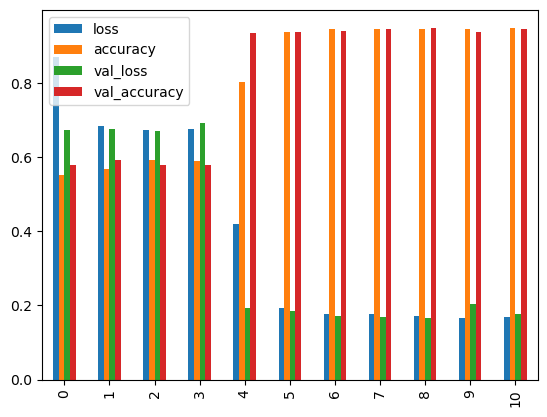

In [59]:
final_history.plot(kind='bar')

In [63]:
model.evaluate(test_img_gen)

163/163 [==============================] - 13s 80ms/step - loss: 0.1782 - accuracy: 0.9427


[0.17815731465816498, 0.9426922798156738]

In [65]:
model.metrics_names

['loss', 'accuracy']

In [67]:
pred = model.predict(test_img_gen)

163/163 [==============================] - 15s 93ms/step


In [68]:
pred

array([[5.6001598e-05],
       [6.3900399e-05],
       [1.9655819e-03],
       ...,
       [9.5270687e-01],
       [9.7862858e-01],
       [9.7973287e-01]], dtype=float32)

In [69]:
predictions = pred > 0.5

In [74]:
pd.DataFrame(predictions==True).count()

0    2600
dtype: int64

In [75]:
pd.DataFrame(predictions==False).count()

0    2600
dtype: int64

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
print(classification_report(test_img_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1300
           1       0.93      0.97      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



In [79]:
print(confusion_matrix(test_img_gen.classes, predictions))

[[1205   95]
 [  41 1259]]


In [80]:
from tensorflow.keras.preprocessing import image

In [83]:
my_img = image.load_img(para_cell, target_size=image_shape)

In [84]:
my_img = image.img_to_array(my_img)

In [85]:
my_img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [86]:
my_img.shape

(130, 130, 3)

In [87]:
my_img_arr = np.expand_dims(my_img, axis=0)

In [88]:
my_img_arr.shape

(1, 130, 130, 3)

In [90]:
val = model.predict(my_img_arr)

1/1 [==============================] - 0s 23ms/step


In [93]:
np.round(val)

array([[0.]], dtype=float32)